In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import random

### **Домашнее задание**

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [5]:
def bias(y, z):
    return (y - z)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # базовый алгоритм
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [8]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [9]:
# Число деревьев в ансамбле
n_trees = 15

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 0.2

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 0.2 на тренировочной выборке: 2335.070083085709
Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 0.2 на тестовой выборке: 3396.4975108702643


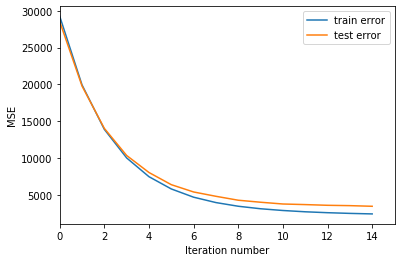

In [11]:
get_error_plot(n_trees, train_errors, test_errors)

#### 1.Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

##### График зависимости ошибки от количества деревьев в ансамбле

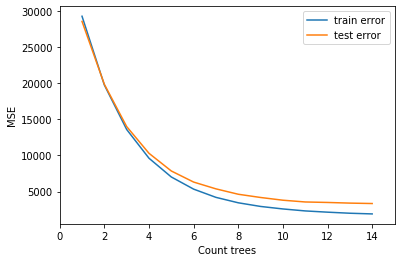

In [12]:
coefs = [1] * n_trees
max_depth = 3
eta = 0.2

my_train_err = []
my_test_err = []
# Число деревьев в ансамбле
max_trees = 15
for cnt_trees in range(1, max_trees):
    trees, train_errors, test_errors = gb_fit(cnt_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    my_train_err.append(train_errors[len(train_errors)-1])
    my_test_err.append(test_errors[len(test_errors)-1])

# строим график
plt.xlabel('Count trees')
plt.ylabel('MSE')
plt.xlim(0, max_trees)
plt.plot(list(range(1, max_trees)), my_train_err, label='train error')
plt.plot(list(range(1, max_trees)), my_test_err, label='test error')
plt.legend(loc='upper right')
plt.show()

График зависимости ошибки от количества деревьев в ансамбле аналогичен предыдущему графику. Каждый раз при обучении алгоритма мы производили одни и те же рассчеты по новой. 

##### График зависимости ошибки от максимальной глубины деревьев

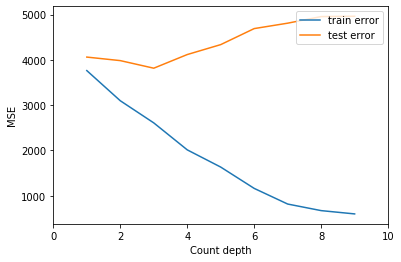

In [13]:
coefs = [1] * n_trees
eta = 0.2
n_trees = 10

my_train_err = []
my_test_err = []
# Число деревьев в ансамбле
max_depth = 10
for cnt_depth in range(1, max_depth):
    trees, train_errors, test_errors = gb_fit(n_trees, cnt_depth, X_train, X_test, y_train, y_test, coefs, eta)
    my_train_err.append(train_errors[len(train_errors)-1])
    my_test_err.append(test_errors[len(test_errors)-1])

# строим график
plt.xlabel('Count depth')
plt.ylabel('MSE')
plt.xlim(0, max_depth)
plt.plot(list(range(1, max_depth)), my_train_err, label='train error')
plt.plot(list(range(1, max_depth)), my_test_err, label='test error')
plt.legend(loc='upper right')
plt.show()

При увеличении глубины деревьев мы видим переробучение уже на глубине более 2.

#### 2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [14]:
# функия возвращает случайные индексы, и в два раза меньше
def get_subsample(len_sample):
    sample_indexes = [i for i in range(len_sample)]
    len_subsample = int(len_sample/2)
    subsample = []
    random.shuffle(sample_indexes) # перемешаем индексы
    subsample = sample_indexes[0:len_subsample].copy()  

    return subsample

In [15]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # получаем случайные индексы
        subsample = get_subsample(X_train.shape[0])
        if len(trees) == 0:
#             производим обчуение на меньшей подвыборке 
            tree.fit(X_train[subsample], y_train[subsample])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train[subsample], trees, coefs, eta)
            tree.fit(X_train[subsample], bias(y_train[subsample], target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [16]:
n_trees = 15
coefs = [1] * n_trees
max_depth = 2
eta = 0.2

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [17]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 0.2 на тренировочной выборке: 2484.2921715394104
Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 0.2 на тестовой выборке: 3417.817028521889


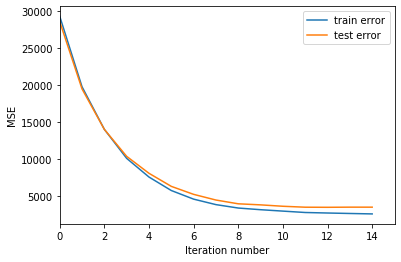

In [18]:
get_error_plot(n_trees, train_errors, test_errors)

Результаты с применением стохастического градиентного бустинга получились такие же как и с применением градиентного бустинга. Однако, вычислительных ресурсов потребовалось меньше.